In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns

# list of models
# Commented few models because they produced very big results which interfere visualization
models = [
#           'RandomForestRegressor',
#           'AdaBoostRegressor',
#           'BaggingRegressor',
#           'DecisionTreeRegressor',
          'DummyRegressor',
          'ExtraTreeRegressor',
          #'ExtraTreesRegressor',
          #'GaussianProcessRegressor',
          #'GradientBoostingRegressor',
          #'HuberRegressor',
          'KNeighborsRegressor',
          #'MLPRegressor',
          #'PassiveAggressiveRegressor',
          #'RANSACRegressor',
          #'SGDRegressor',
          #'TheilSenRegressor'
         ]
buildingtypes = ['Office', 'PrimClass', 'UnivClass', 'UnivDorm', 'UnivLab']

In [2]:
# Generate different line styles
# 24 different different lines will be generated
lineStyles = ['-', '--', '-.', ':']
lineColors = ['b', 'g', 'r', 'c', 'm', 'y']
styles = []

for j in range(3):
    for i in range(5):
        styles.append(lineColors[i] + lineStyles[(i + j) % 4])

In [14]:
def visualize(arg):
    for buildingtype in buildingtypes:
        # Draw lines on single plot
        
        plt.style.use('seaborn-whitegrid')
        plt.figure(figsize=(15,3))
    
    
        for i in range(len(models)):
            dataframes = []
            data = pd.read_csv('../results/' + models[i] + '_metrics_' + buildingtype + '.csv')
            data = data.drop(columns=['Unnamed: 0'])
            data['buidingtype'] = buildingtype
            dataframes.append(data)
            result = pd.concat(dataframes)
            
            rows =  result[result['buidingtype']==buildingtype]['MAPE']
            # Single line creator
            value, = plt.plot(rows, styles[i], label=models[i])

        # Draw plot
        plt.title(buildingtype, loc='left')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.ylabel(arg)
        plt.xlabel('Buildings')
        plt.show()


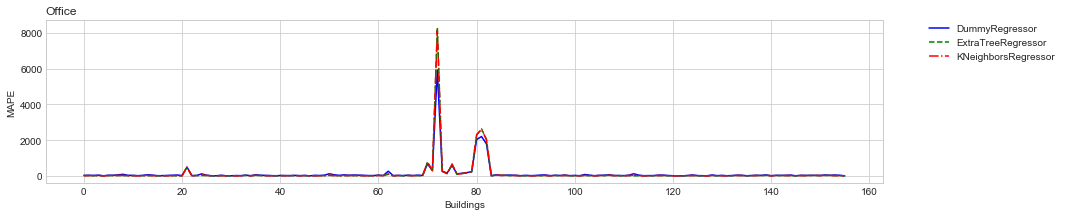

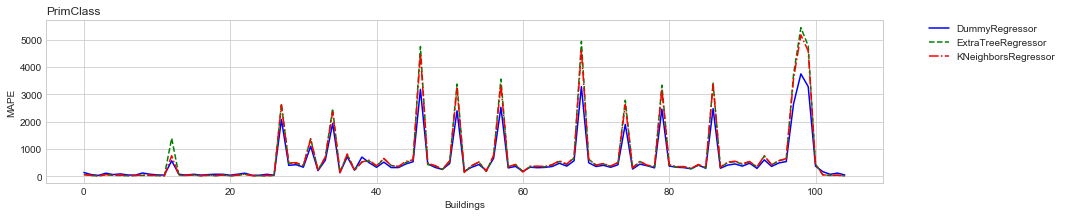

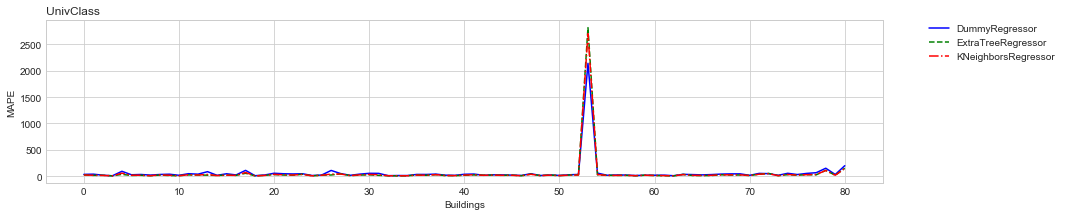

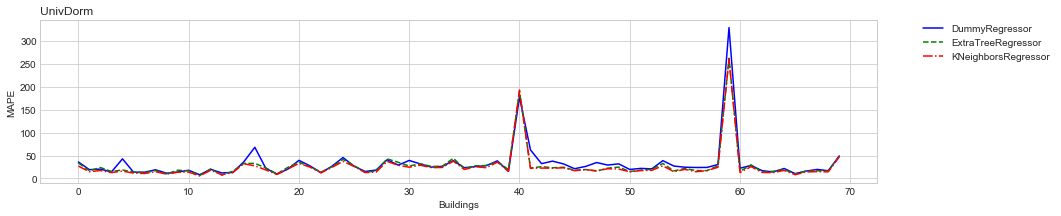

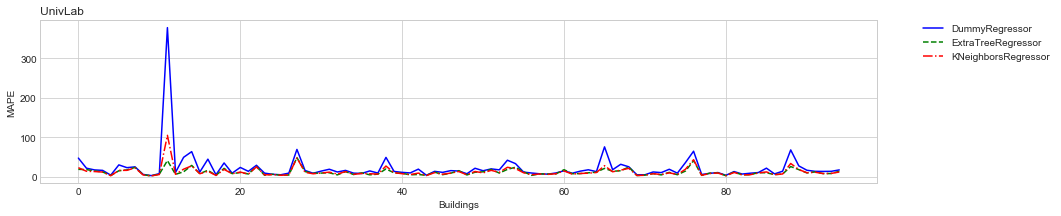

In [15]:
visualize('MAPE')

# Box plot array visualization

Based on this: https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot

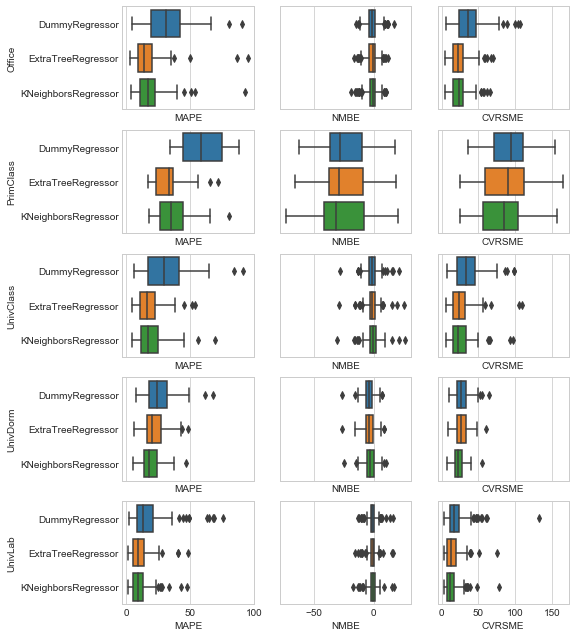

In [4]:
f, axes = plt.subplots(5, 3, figsize=(8,11), sharex='col')
plt.style.use('seaborn-whitegrid')

for buildingtype in buildingtypes:
        # Draw lines on single plot
        
        
    
        MAPE = {}
        NMBE = {}
        CVRSME = {}
        for i in range(len(models)):
            
            dataframes = []
            data = pd.read_csv('../results/' + models[i] + '_metrics_' + buildingtype + '.csv')
            data = data.drop(columns=['Unnamed: 0'])
            data['buidingtype'] = buildingtype
            dataframes.append(data)
            result = pd.concat(dataframes)
            
            MAPE[models[i]] =  result[result['buidingtype']==buildingtype]['MAPE']
            NMBE[models[i]] =  result[result['buidingtype']==buildingtype]['NMBE']
            CVRSME[models[i]] =  result[result['buidingtype']==buildingtype]['CVRSME']
        
        MAPE_df = pd.DataFrame(MAPE)
        MAPE_df = MAPE_df[MAPE_df<100].melt()
        ax1 = sns.boxplot(data=MAPE_df, x='value', y='variable', ax=axes[buildingtypes.index(buildingtype),0])
        ax1.set(ylabel=buildingtype, xlabel="MAPE")
        
        NMBE_df = pd.DataFrame(NMBE)
        NMBE_df = NMBE_df.melt() #[NMBE_df<100]
        ax2 = sns.boxplot(data=NMBE_df, x='value', y='variable', ax=axes[buildingtypes.index(buildingtype),1])
        ax2.set(ylabel="", xlabel="NMBE", yticks=[])
    
        CVRSME_df = pd.DataFrame(CVRSME)
        CVRSME_df = CVRSME_df.melt() #[NMBE_df<100]
        ax3 = sns.boxplot(data=CVRSME_df, x='value', y='variable', ax=axes[buildingtypes.index(buildingtype),2])
        ax3.set(ylabel="", xlabel="CVRSME", yticks=[])
        
#             sns.boxplot(y="b", x= "a", data=rows,  orient='v' ) #, ax=axes[0]
#             print(rows)
            # Single line creator
#             value, = plt.plot(rows, styles[i], label=models[i])
            
# sns.boxplot(y="b", x= "a", data=df,  orient='v' , ax=axes[0])
# sns.boxplot(y="c", x= "a", data=df,  orient='v' , ax=axes[1])